

# <span style="color:blue"> Project Data Mining</span>


# <span style="color:blue"> Thème :</span> Classification et clustering des tweets en Python
# <span style="color:blue"> Réalisé par :</span>  Nabil Lefi 3DNI1

## <span style="color:blue">Objectifs :</span>

* Maitriser l’API de twitter pour l’extraction des tweets
* Appliquer les principes de nettoyage des données
* Maitriser la partie NLP (natural language processing) avec NLTK en Python
* Classer les tweets : regrouper ensemble les tweets qui sont similaires

## <span style="color:blue"> Twitter</span>

Twitter est un service de réseautage social et de micro-blogging sur lequel les utilisateurs publient et interagissent les uns avec les autres via des messages appelés «tweets». Il est classé au 6e rang des sites et applications de réseautage social les plus populaires par Dream Grow en avril 2020 avec une moyenne de 330 millions d'utilisateurs actifs par mois.

## <span style="color:blue">Spécifications :</span>

Imaginons que vous avez un compte Twitter, et que vous lez suivre les tweets (texte très court) sur ce réseau social. Vu le nombre colossal de Tweets, et faute de temps, vous n’avez pas la possibilité de les lire tous. Pour cela, vous avez besoin d’une application qui va jouer le rôle d’assistantet qui va vous effectuer un résumé de toutes ces informations. Une des approches qu’on peut utiliser estde le classer sous former de groupes de sorte à ce qu’on présente à l’utilisateur un seul Tweet de chaque groupe.

## <span style="color:blue">Travail à Faire :</span>

* On a Telecharger les tweets a partir de Twitter en utilisant l'API de twitter. Pour cela, vous devriez un compte « Twitter Developper ». Pour cela, vous devriez telecharger au moins 10 mille twwets.
* On Utiliser la bibliothèque NLTK pour effectuer une analyse de chaque tweet et le transformer en un ensemble de mots en suivant les différentes étapes de base du processus NLP (Natural LanguageProcessing). Pour la documentation sur NLTK et les différentes phases du NLP. Utiliser l’algorithme K-Means pour classer les Tweets en k classes (vous pouvez essayer plusieurs valeurs de k allant de 3 à 30 par exemple).
* Après avoir récupéré les classes, choisissez un Tweet par classe comme représentant. Les Tweets choisis seront les résumés de toutes les informations contenues dans les Tweets.

## <span style="color:blue"> Réalisation:</span>

#### <span style="color:green">L'importation des différents bibliothèques :</span>

In [1]:
#import the tweepy and pandas libraries:
import tweepy
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import re
import string
import nltk 
import io 
import seaborn as sns
import collections

In [37]:
# Consumer keys and access tokens, used for OAuth
consumer_key = 'gTOtUcUgaKid77h4wajeMAYMy'
consumer_secret = 'lPUcq66PIVChBs8NPEmai4T2dj2fUoHtvTEOsNEWGHMnosYGsu'
access_token = '1127537413553836039-oJYi1ETGHeEsiMyHsVCA78FUglToJ1'
access_token_secret = 'Javf8TtcaJL79VapHOPqxyErBtl8tTrDUhmuxfWSbiEcC'

In [38]:
# OAuth process, using the keys and tokens
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

Création de l'interface proprement dite, en utilisant l'authentification

In [39]:
# Creation of the actual interface, using authentication
api = tweepy.API(auth, wait_on_rate_limit= True)

#### <span style="color:green">On va télécharger les Tweets à partir de Twitter en utilisant l’API de twitter. Pour cela, on doit obetenir un compte « Twitter Developer ».</span>

In [40]:
posts = tweepy.Cursor(api.search,q="FootBall", lang = "en",count=10000).items(12000)
data_analysis = pd.DataFrame(columns = ['Tweets'])
i=0
for tweet in posts:
      data_analysis.loc[i,"Tweets"] = tweet.text
      i+=1

In [41]:
data_analysis.shape

(12000, 1)

#### <span style="color:green">Maintenant on va sauvegarder ses tweets dans un fichier csv et les afficher</span>


In [42]:
data_analysis.to_csv('data_analysis.csv',index = False)
data_analysis.head(20)

,Tweets
0,RT @AnnieHanson_: So proud of our OU Moms! ♥️ ...
1,RT @MySportsUpdate: Football schedule coming u...
2,Five days to find out the cost of calling an i...
3,The Monett football team had four athletes sec...
4,Enter the #49ersFoundation Week 15 Gameday Swe...
5,@IrelandEmbUSA @MayoGAA Buffalo Bills are Amer...
6,@buddyfelch_24 @pattysheehan25 Nothing better ...
7,Football and pheasants once brought #Vikings t...
8,RT @Pinson_Football: Congrats to @QUEL2K on hi...
9,@KU_Football @Big12Conference Hope 82 comes ba...


In [43]:
data_analysis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 0 to 11999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Tweets  12000 non-null  object
dtypes: object(1)
memory usage: 507.5+ KB


## <span style="color:blue"> 1- Prétraitement des tweets :</span>
 
Les tweets contiennent des objets inutiles tels que des hashtags, des mentions, des liens et des signes de ponctuation qui peuvent affecter les performances d'un algorithme et doivent donc être supprimés. Tous les textes sont convertis en minuscules pour éviter que les algorithmes n'interprètent les mêmes mots avec des cas différents comme différents.

In [44]:
#Clean the text
#Create a function to clean the tweets
def cleanText(text):
    
    text = re.sub(r'@[A-Za-z0-9]+','', text) #Removed @mentions
    text = re.sub(r'RT[\s]+','', text) #Removing RT
    text = re.sub(r'https?:\/\/\S+','', text) #Removing the hyper link

    return text

#cleaning the text
data_analysis['clean Tweets']=data_analysis['Tweets'].apply(cleanText)
data_analysis.head(20)

,Tweets,clean Tweets
0,RT @AnnieHanson_: So proud of our OU Moms! ♥️ ...,_: So proud of our OU Moms! ♥️ \n\nThank you l...
1,RT @MySportsUpdate: Football schedule coming u...,: Football schedule coming up: \n\n*2 games to...
2,Five days to find out the cost of calling an i...,Five days to find out the cost of calling an i...
3,The Monett football team had four athletes sec...,The Monett football team had four athletes sec...
4,Enter the #49ersFoundation Week 15 Gameday Swe...,Enter the #49ersFoundation Week 15 Gameday Swe...
5,@IrelandEmbUSA @MayoGAA Buffalo Bills are Amer...,Buffalo Bills are American football version ...
6,@buddyfelch_24 @pattysheehan25 Nothing better ...,_24 Nothing better than “football team” fans ...
7,Football and pheasants once brought #Vikings t...,Football and pheasants once brought #Vikings t...
8,RT @Pinson_Football: Congrats to @QUEL2K on hi...,_Football: Congrats to on his offer to play _...
9,@KU_Football @Big12Conference Hope 82 comes ba...,_Football Hope 82 comes back. Big time tools ...


In [45]:
emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]")
data_analysis['clean emoji']=data_analysis['clean Tweets'].str.replace(r'[^\x00-\x7F]+', '', regex=True)
data_analysis.head(20)

,Tweets,clean Tweets,clean emoji
0,RT @AnnieHanson_: So proud of our OU Moms! ♥️ ...,_: So proud of our OU Moms! ♥️ \n\nThank you l...,_: So proud of our OU Moms! \n\nThank you lad...
1,RT @MySportsUpdate: Football schedule coming u...,: Football schedule coming up: \n\n*2 games to...,: Football schedule coming up: \n\n*2 games to...
2,Five days to find out the cost of calling an i...,Five days to find out the cost of calling an i...,Five days to find out the cost of calling an i...
3,The Monett football team had four athletes sec...,The Monett football team had four athletes sec...,The Monett football team had four athletes sec...
4,Enter the #49ersFoundation Week 15 Gameday Swe...,Enter the #49ersFoundation Week 15 Gameday Swe...,Enter the #49ersFoundation Week 15 Gameday Swe...
5,@IrelandEmbUSA @MayoGAA Buffalo Bills are Amer...,Buffalo Bills are American football version ...,Buffalo Bills are American football version ...
6,@buddyfelch_24 @pattysheehan25 Nothing better ...,_24 Nothing better than “football team” fans ...,_24 Nothing better than football team fans be...
7,Football and pheasants once brought #Vikings t...,Football and pheasants once brought #Vikings t...,Football and pheasants once brought #Vikings t...
8,RT @Pinson_Football: Congrats to @QUEL2K on hi...,_Football: Congrats to on his offer to play _...,_Football: Congrats to on his offer to play _...
9,@KU_Football @Big12Conference Hope 82 comes ba...,_Football Hope 82 comes back. Big time tools ...,_Football Hope 82 comes back. Big time tools ...


In [46]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [47]:
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text
data_analysis['Tweet_punct'] = data_analysis['clean emoji'].apply(lambda x: remove_punct(x))
data_analysis.head(20)

,Tweets,clean Tweets,clean emoji,Tweet_punct
0,RT @AnnieHanson_: So proud of our OU Moms! ♥️ ...,_: So proud of our OU Moms! ♥️ \n\nThank you l...,_: So proud of our OU Moms! \n\nThank you lad...,So proud of our OU Moms \n\nThank you ladies...
1,RT @MySportsUpdate: Football schedule coming u...,: Football schedule coming up: \n\n*2 games to...,: Football schedule coming up: \n\n*2 games to...,Football schedule coming up \n\n games tomorr...
2,Five days to find out the cost of calling an i...,Five days to find out the cost of calling an i...,Five days to find out the cost of calling an i...,Five days to find out the cost of calling an i...
3,The Monett football team had four athletes sec...,The Monett football team had four athletes sec...,The Monett football team had four athletes sec...,The Monett football team had four athletes sec...
4,Enter the #49ersFoundation Week 15 Gameday Swe...,Enter the #49ersFoundation Week 15 Gameday Swe...,Enter the #49ersFoundation Week 15 Gameday Swe...,Enter the ersFoundation Week Gameday Sweepsta...
5,@IrelandEmbUSA @MayoGAA Buffalo Bills are Amer...,Buffalo Bills are American football version ...,Buffalo Bills are American football version ...,Buffalo Bills are American football version ...
6,@buddyfelch_24 @pattysheehan25 Nothing better ...,_24 Nothing better than “football team” fans ...,_24 Nothing better than football team fans be...,Nothing better than football team fans beati...
7,Football and pheasants once brought #Vikings t...,Football and pheasants once brought #Vikings t...,Football and pheasants once brought #Vikings t...,Football and pheasants once brought Vikings to...
8,RT @Pinson_Football: Congrats to @QUEL2K on hi...,_Football: Congrats to on his offer to play _...,_Football: Congrats to on his offer to play _...,Football Congrats to on his offer to play foo...
9,@KU_Football @Big12Conference Hope 82 comes ba...,_Football Hope 82 comes back. Big time tools ...,_Football Hope 82 comes back. Big time tools ...,Football Hope comes back Big time tools if i...



#### <span style="color:green">Tokenisation et suppression des mots vides</span>



In [48]:
def tokenization(text):
    text = re.split('\W+', text)
    return text

data_analysis['Tweet_tokenized'] = data_analysis['Tweet_punct'].apply(lambda x: tokenization(x.lower()))
data_analysis.head(20)

,Tweets,clean Tweets,clean emoji,Tweet_punct,Tweet_tokenized
0,RT @AnnieHanson_: So proud of our OU Moms! ♥️ ...,_: So proud of our OU Moms! ♥️ \n\nThank you l...,_: So proud of our OU Moms! \n\nThank you lad...,So proud of our OU Moms \n\nThank you ladies...,"[, so, proud, of, our, ou, moms, thank, you, l..."
1,RT @MySportsUpdate: Football schedule coming u...,: Football schedule coming up: \n\n*2 games to...,: Football schedule coming up: \n\n*2 games to...,Football schedule coming up \n\n games tomorr...,"[, football, schedule, coming, up, games, tomo..."
2,Five days to find out the cost of calling an i...,Five days to find out the cost of calling an i...,Five days to find out the cost of calling an i...,Five days to find out the cost of calling an i...,"[five, days, to, find, out, the, cost, of, cal..."
3,The Monett football team had four athletes sec...,The Monett football team had four athletes sec...,The Monett football team had four athletes sec...,The Monett football team had four athletes sec...,"[the, monett, football, team, had, four, athle..."
4,Enter the #49ersFoundation Week 15 Gameday Swe...,Enter the #49ersFoundation Week 15 Gameday Swe...,Enter the #49ersFoundation Week 15 Gameday Swe...,Enter the ersFoundation Week Gameday Sweepsta...,"[enter, the, ersfoundation, week, gameday, swe..."
5,@IrelandEmbUSA @MayoGAA Buffalo Bills are Amer...,Buffalo Bills are American football version ...,Buffalo Bills are American football version ...,Buffalo Bills are American football version ...,"[, buffalo, bills, are, american, football, ve..."
6,@buddyfelch_24 @pattysheehan25 Nothing better ...,_24 Nothing better than “football team” fans ...,_24 Nothing better than football team fans be...,Nothing better than football team fans beati...,"[, nothing, better, than, football, team, fans..."
7,Football and pheasants once brought #Vikings t...,Football and pheasants once brought #Vikings t...,Football and pheasants once brought #Vikings t...,Football and pheasants once brought Vikings to...,"[football, and, pheasants, once, brought, viki..."
8,RT @Pinson_Football: Congrats to @QUEL2K on hi...,_Football: Congrats to on his offer to play _...,_Football: Congrats to on his offer to play _...,Football Congrats to on his offer to play foo...,"[football, congrats, to, on, his, offer, to, p..."
9,@KU_Football @Big12Conference Hope 82 comes ba...,_Football Hope 82 comes back. Big time tools ...,_Football Hope 82 comes back. Big time tools ...,Football Hope comes back Big time tools if i...,"[football, hope, comes, back, big, time, tools..."


In [49]:
data_analysis['Tweet_tokenized'].to_csv('cleaning_data_analysis.csv',index = False)

In [50]:
#data_analysis.head(20)

## <span style="color:blue"> 2- Traitement des tweets : NLP (Natural LanguageProcessing):</span>
On doit procéder à l’analyse du tweet en respectant les différentes étapes du NLP (Natural LanguageProcessing). La bibliothèque à utiliser est NLTK en Python.

In [51]:
nltk.download('stopwords' )

[nltk_data] Downloading package stopwords to /home/nabil/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [53]:
#from nltk.corpus import stopwords  
#from nltk.tokenize import word_tokenize  
  
# word_tokenize accepts 
# a string as an input, not a file.  
#stop_words = set(stopwords.words('english'))  
#file1 = open("cleaning_data_analysis.csv")  
  
# Use this to read file content as a stream:  
#line = file1.read() 
#words = line.split()  
#for r in words:  
#    if not r in stop_words:  
#        appendFile = open('cleaning_data_analysis.csv','a')  
#        appendFile.write(" "+r)  
#        appendFile.close() 
#print(stop_words)

{'s', "doesn't", 'down', 'during', 'over', "couldn't", "should've", 'only', 'my', 'those', 'on', 'will', 'against', 'these', 'won', 'who', 've', 'in', 'did', 'most', "wasn't", 'their', 'but', 'own', 'wouldn', 'she', 'the', 'is', 'into', 'while', 'o', 'aren', 'mightn', "haven't", "shan't", 'after', 'no', "wouldn't", 'this', 'didn', 'couldn', 'between', 'and', 'haven', 'be', 'me', 'now', 'am', 'can', "shouldn't", 'of', 'by', 'don', "didn't", 'shan', 'any', 'we', "you'd", 'y', 'with', 'both', 'when', 'out', 'doing', 'because', 'being', 'at', 'ours', 't', 'yourselves', 'so', "hasn't", 'off', 'his', 'it', 'or', 'where', "needn't", 'if', 'to', 're', 'not', 'does', 'up', "mustn't", 'himself', 'shouldn', 'very', 'there', "it's", 'other', 'been', "you've", 'your', 'i', 'such', 'herself', 'nor', 'ma', "won't", 'our', 'just', 'you', "you're", 'further', 'as', 'doesn', 'again', 'theirs', 'needn', 'him', 'weren', 'its', 'itself', 'having', 'same', 'some', "hadn't", 'has', 'how', 'for', 'that', "you

In [54]:
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
ps = PorterStemmer() 
stemed_dataset=[]
for i in range(0,data_analysis.shape[0]):
    stemmed_array=data_analysis['Tweet_punct'][i].split()
    stemmed=[ps.stem(word) for word in stemmed_array if not word in set(stopwords.words('english'))]
    stemmed=' '.join(stemmed)
    stemed_dataset.append(stemmed)
print(stemed_dataset[0:10])

['So proud OU mom thank ladi rais amaz son give back local commun', 'footbal schedul come game tomorrow night game earli window sunday game late window sunday', 'five day find cost call illegitim titl amp illeg releg amp cost scottish footba', 'the monett footbal team four athlet secur five spot alldistrict footbal team', 'enter ersfound week gameday sweepstak present chanc win john Ly', 'buffalo bill american footbal version mayo irish footbal team honmayo', 'noth better footbal team fan beat chest lose record', 'footbal pheasant brought vike togeth iowa vikingschat', 'footbal congrat offer play footbal fearthespear pushon', 'footbal hope come back big time tool injuri free two hamilton kid']


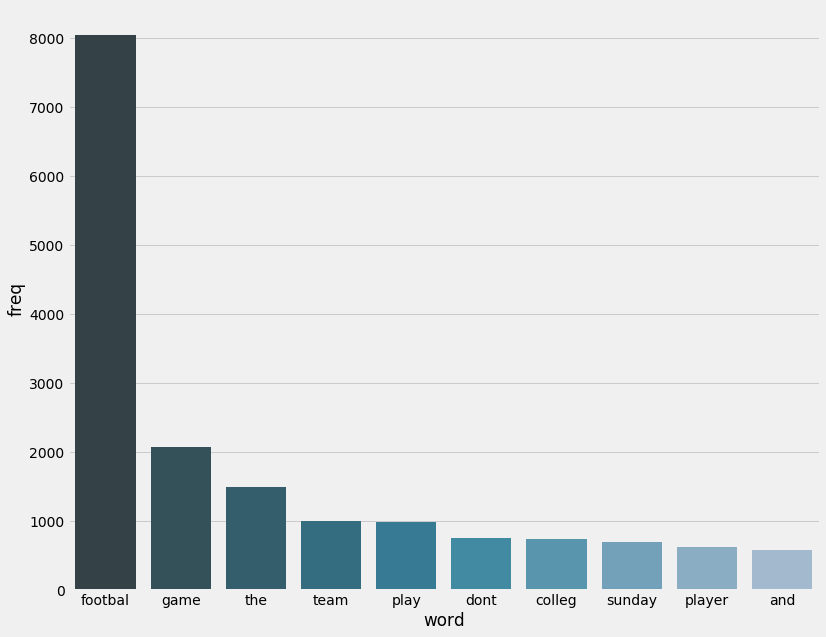

In [55]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
bow = cv.fit_transform(stemed_dataset)
word_freq = dict(zip(cv.get_feature_names(), np.asarray(bow.sum(axis=0)).ravel()))
word_counter = collections.Counter(word_freq)
word_counter_df = pd.DataFrame(word_counter.most_common(10), columns = ['word', 'freq'])
fig, ax = plt.subplots(figsize=(12, 10))
sns.barplot(x="word", y="freq", data=word_counter_df, palette="PuBuGn_d", ax=ax)
plt.show();

In [56]:
#!pip install wordcloud

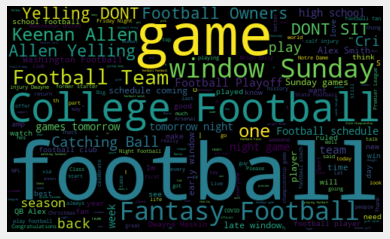

In [57]:
from wordcloud import WordCloud 
plt.style.use('fivethirtyeight')
# Plot the word cloud
allWords = ' '.join([twts for twts in data_analysis['Tweet_punct']])
wordCloud = WordCloud(width = 500, height=300, random_state = 21, max_font_size=119).generate(allWords)
#wordCloud=WordCloud(background_color='black',mode="RGB", width=2000 , height=1000).generate(allWords)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

In [58]:
X=cv.fit_transform(stemed_dataset)
print(X)

  (0, 8147)	1
  (0, 7012)	1
  (0, 6420)	1
  (0, 5794)	1
  (0, 8785)	1
  (0, 4966)	1
  (0, 7150)	1
  (0, 330)	1
  (0, 8198)	1
  (0, 3629)	1
  (0, 651)	1
  (0, 5215)	1
  (0, 1844)	1
  (1, 3305)	1
  (1, 7729)	1
  (1, 1822)	1
  (1, 3526)	3
  (1, 8976)	1
  (1, 6097)	1
  (1, 2673)	1
  (1, 9775)	2
  (1, 8547)	2
  (1, 5012)	1
  (2, 3218)	1
  (2, 2234)	1
  :	:
  (11997, 2320)	1
  (11997, 1062)	1
  (11997, 1292)	1
  (11998, 3305)	1
  (11998, 8917)	1
  (11998, 6042)	1
  (11998, 1752)	1
  (11998, 6009)	1
  (11998, 8842)	1
  (11998, 9277)	1
  (11998, 536)	1
  (11998, 7712)	1
  (11998, 1507)	1
  (11998, 6214)	1
  (11999, 5149)	1
  (11999, 3591)	1
  (11999, 2934)	1
  (11999, 3725)	1
  (11999, 8777)	1
  (11999, 5341)	2
  (11999, 7223)	1
  (11999, 9088)	1
  (11999, 8972)	1
  (11999, 1125)	1
  (11999, 9177)	1


## <span style="color:blue">  3- Classification des tweets:</span>
Etant donné un ensemble de tweets, l’objectif est de les résumer sous formes de groupes de sorte à ce que les Tweets qui sont dans le même groupe soient similaires. Ainsi, l’utilisateur pourra par la suite lire juste un Tweet de chaque groupe (le Tweet qui est le centroïde de groupes).
* <span style="color:green">On va Utiliser l’algorithme K-Means pour classer les Tweets en 30 classes.</span>



In [64]:
from sklearn.cluster import KMeans
nb=[]

In [65]:
for i in range(1,30):
    Kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0,verbose=True)
    Kmeans.fit(X)
    nb.append(Kmeans.inertia_)

Initialization complete
Iteration  0, inertia 271391.000
Iteration  1, inertia 129147.498
Converged at iteration 1: center shift 0.000000e+00 within tolerance 1.071728e-07
Initialization complete
Iteration  0, inertia 261125.000
Iteration  1, inertia 129147.498
Converged at iteration 1: center shift 0.000000e+00 within tolerance 1.071728e-07
Initialization complete
Iteration  0, inertia 261013.000
Iteration  1, inertia 129147.498
Converged at iteration 1: center shift 0.000000e+00 within tolerance 1.071728e-07
Initialization complete
Iteration  0, inertia 274093.000
Iteration  1, inertia 129147.498
Converged at iteration 1: center shift 0.000000e+00 within tolerance 1.071728e-07
Initialization complete
Iteration  0, inertia 274417.000
Iteration  1, inertia 129147.498
Converged at iteration 1: center shift 0.000000e+00 within tolerance 1.071728e-07
Initialization complete
Iteration  0, inertia 265265.000
Iteration  1, inertia 129147.498
Converged at iteration 1: center shift 0.000000e+0

Iteration  0, inertia 195283.000
Iteration  1, inertia 122400.665
Iteration  2, inertia 120820.130
Iteration  3, inertia 119697.183
Iteration  4, inertia 119676.923
Iteration  5, inertia 119675.617
Iteration  6, inertia 119673.202
Iteration  7, inertia 119672.892
Converged at iteration 7: center shift 0.000000e+00 within tolerance 1.071728e-07
Initialization complete
Iteration  0, inertia 178004.000
Iteration  1, inertia 126712.011
Iteration  2, inertia 126412.642
Iteration  3, inertia 126315.180
Iteration  4, inertia 126308.934
Iteration  5, inertia 126302.892
Iteration  6, inertia 126302.737
Converged at iteration 6: center shift 0.000000e+00 within tolerance 1.071728e-07
Initialization complete
Iteration  0, inertia 144365.000
Iteration  1, inertia 128905.152
Iteration  2, inertia 128873.786
Iteration  3, inertia 128804.703
Iteration  4, inertia 128803.340
Converged at iteration 4: center shift 0.000000e+00 within tolerance 1.071728e-07
Initialization complete
Iteration  0, inertia 

Iteration  4, inertia 122308.657
Iteration  5, inertia 122219.769
Iteration  6, inertia 122219.572
Converged at iteration 6: center shift 0.000000e+00 within tolerance 1.071728e-07
Initialization complete
Iteration  0, inertia 165690.000
Iteration  1, inertia 119666.082
Iteration  2, inertia 119427.809
Iteration  3, inertia 119300.015
Iteration  4, inertia 119228.088
Converged at iteration 4: center shift 0.000000e+00 within tolerance 1.071728e-07
Initialization complete
Iteration  0, inertia 193861.000
Iteration  1, inertia 120020.442
Iteration  2, inertia 119672.651
Iteration  3, inertia 119282.818
Iteration  4, inertia 118111.536
Iteration  5, inertia 117657.206
Iteration  6, inertia 117649.532
Converged at iteration 6: center shift 0.000000e+00 within tolerance 1.071728e-07
Initialization complete
Iteration  0, inertia 201978.000
Iteration  1, inertia 120346.968
Iteration  2, inertia 119714.054
Iteration  3, inertia 119419.355
Iteration  4, inertia 119211.007
Iteration  5, inertia 

Iteration  7, inertia 112242.429
Iteration  8, inertia 112241.793
Iteration  9, inertia 112239.522
Iteration 10, inertia 112238.480
Iteration 11, inertia 112225.850
Iteration 12, inertia 112219.009
Iteration 13, inertia 112213.808
Iteration 14, inertia 112212.443
Iteration 15, inertia 112211.498
Iteration 16, inertia 112210.863
Iteration 17, inertia 112207.178
Iteration 18, inertia 112196.994
Iteration 19, inertia 112194.317
Iteration 20, inertia 112194.164
Converged at iteration 20: center shift 0.000000e+00 within tolerance 1.071728e-07
Initialization complete
Iteration  0, inertia 165887.000
Iteration  1, inertia 118429.479
Iteration  2, inertia 118420.415
Iteration  3, inertia 118417.898
Iteration  4, inertia 118417.673
Converged at iteration 4: center shift 0.000000e+00 within tolerance 1.071728e-07
Initialization complete
Iteration  0, inertia 154829.000
Iteration  1, inertia 111586.422
Iteration  2, inertia 111286.115
Iteration  3, inertia 111269.407
Iteration  4, inertia 111246

Iteration 10, inertia 111549.744
Iteration 11, inertia 111537.003
Iteration 12, inertia 111531.418
Iteration 13, inertia 111526.383
Iteration 14, inertia 111524.412
Iteration 15, inertia 111523.447
Iteration 16, inertia 111519.551
Iteration 17, inertia 111510.135
Iteration 18, inertia 111506.919
Iteration 19, inertia 111506.765
Converged at iteration 19: center shift 0.000000e+00 within tolerance 1.071728e-07
Initialization complete
Iteration  0, inertia 162831.000
Iteration  1, inertia 117204.711
Iteration  2, inertia 117099.081
Iteration  3, inertia 117005.194
Iteration  4, inertia 116933.929
Iteration  5, inertia 116929.170
Converged at iteration 5: center shift 0.000000e+00 within tolerance 1.071728e-07
Initialization complete
Iteration  0, inertia 146516.000
Iteration  1, inertia 110954.888
Iteration  2, inertia 110917.468
Iteration  3, inertia 110899.942
Iteration  4, inertia 110857.284
Iteration  5, inertia 110482.042
Iteration  6, inertia 110099.998
Iteration  7, inertia 110090

Iteration 14, inertia 111245.425
Iteration 15, inertia 111244.461
Iteration 16, inertia 111240.586
Iteration 17, inertia 111231.179
Iteration 18, inertia 111227.967
Iteration 19, inertia 111227.813
Converged at iteration 19: center shift 0.000000e+00 within tolerance 1.071728e-07
Initialization complete
Iteration  0, inertia 162703.000
Iteration  1, inertia 117107.914
Iteration  2, inertia 117002.974
Iteration  3, inertia 116919.963
Iteration  4, inertia 116893.948
Iteration  5, inertia 116890.306
Iteration  6, inertia 116889.657
Iteration  7, inertia 116885.567
Iteration  8, inertia 116867.806
Iteration  9, inertia 116854.939
Iteration 10, inertia 116832.972
Converged at iteration 10: center shift 0.000000e+00 within tolerance 1.071728e-07
Initialization complete
Iteration  0, inertia 142607.000
Iteration  1, inertia 108273.629
Iteration  2, inertia 108217.096
Iteration  3, inertia 108185.549
Iteration  4, inertia 108150.775
Iteration  5, inertia 108119.761
Iteration  6, inertia 10810

Iteration  1, inertia 115184.410
Iteration  2, inertia 114476.551
Iteration  3, inertia 114206.348
Iteration  4, inertia 114018.962
Iteration  5, inertia 114009.845
Iteration  6, inertia 114009.231
Converged at iteration 6: center shift 0.000000e+00 within tolerance 1.071728e-07
Initialization complete
Iteration  0, inertia 134427.000
Iteration  1, inertia 109770.712
Iteration  2, inertia 109583.491
Iteration  3, inertia 109487.169
Iteration  4, inertia 109476.923
Iteration  5, inertia 109438.062
Iteration  6, inertia 109384.984
Iteration  7, inertia 109374.400
Iteration  8, inertia 109290.091
Iteration  9, inertia 109265.660
Iteration 10, inertia 109256.942
Iteration 11, inertia 109255.807
Iteration 12, inertia 109255.375
Iteration 13, inertia 109254.189
Iteration 14, inertia 109254.014
Converged at iteration 14: center shift 0.000000e+00 within tolerance 1.071728e-07
Initialization complete
Iteration  0, inertia 154297.000
Iteration  1, inertia 109961.674
Iteration  2, inertia 109314

Iteration  3, inertia 111279.097
Iteration  4, inertia 111275.849
Iteration  5, inertia 111275.740
Converged at iteration 5: center shift 0.000000e+00 within tolerance 1.071728e-07
Initialization complete
Iteration  0, inertia 136786.000
Iteration  1, inertia 113427.133
Iteration  2, inertia 112846.874
Iteration  3, inertia 112482.133
Iteration  4, inertia 112356.023
Iteration  5, inertia 112347.969
Iteration  6, inertia 112339.143
Iteration  7, inertia 112329.248
Iteration  8, inertia 112326.472
Iteration  9, inertia 112323.656
Converged at iteration 9: center shift 0.000000e+00 within tolerance 1.071728e-07
Initialization complete
Iteration  0, inertia 145109.000
Iteration  1, inertia 109662.471
Iteration  2, inertia 109013.606
Iteration  3, inertia 108967.748
Iteration  4, inertia 108862.986
Iteration  5, inertia 108783.493
Iteration  6, inertia 108705.921
Iteration  7, inertia 108466.740
Iteration  8, inertia 108085.965
Iteration  9, inertia 107815.031
Iteration 10, inertia 107805.

Iteration 23, inertia 108029.166
Iteration 24, inertia 108025.401
Iteration 25, inertia 108016.198
Iteration 26, inertia 108013.674
Converged at iteration 26: center shift 0.000000e+00 within tolerance 1.071728e-07
Initialization complete
Iteration  0, inertia 153958.000
Iteration  1, inertia 110124.871
Iteration  2, inertia 110005.727
Iteration  3, inertia 109968.740
Iteration  4, inertia 109952.157
Iteration  5, inertia 109951.481
Iteration  6, inertia 109951.477
Converged at iteration 6: center shift 0.000000e+00 within tolerance 1.071728e-07
Initialization complete
Iteration  0, inertia 141894.000
Iteration  1, inertia 107637.992
Iteration  2, inertia 107578.694
Iteration  3, inertia 107547.161
Iteration  4, inertia 107512.385
Iteration  5, inertia 107481.382
Iteration  6, inertia 107467.469
Iteration  7, inertia 107448.539
Iteration  8, inertia 107443.494
Iteration  9, inertia 107440.132
Iteration 10, inertia 107438.526
Iteration 11, inertia 107437.318
Iteration 12, inertia 107436

Iteration  3, inertia 106496.325
Iteration  4, inertia 106414.814
Iteration  5, inertia 106325.334
Iteration  6, inertia 106322.816
Converged at iteration 6: center shift 0.000000e+00 within tolerance 1.071728e-07
Initialization complete
Iteration  0, inertia 126222.000
Iteration  1, inertia 108234.906
Iteration  2, inertia 108050.400
Iteration  3, inertia 107954.112
Iteration  4, inertia 107942.905
Iteration  5, inertia 107922.839
Iteration  6, inertia 107744.972
Iteration  7, inertia 107622.477
Iteration  8, inertia 107509.982
Iteration  9, inertia 107499.409
Iteration 10, inertia 107499.130
Converged at iteration 10: center shift 0.000000e+00 within tolerance 1.071728e-07
Initialization complete
Iteration  0, inertia 146973.000
Iteration  1, inertia 108760.493
Iteration  2, inertia 108292.135
Iteration  3, inertia 107961.734
Iteration  4, inertia 107817.561
Iteration  5, inertia 107804.072
Iteration  6, inertia 107794.560
Iteration  7, inertia 107793.244
Iteration  8, inertia 107790

Iteration  6, inertia 110652.324
Iteration  7, inertia 110651.078
Iteration  8, inertia 110650.793
Converged at iteration 8: center shift 0.000000e+00 within tolerance 1.071728e-07
Initialization complete
Iteration  0, inertia 146347.000
Iteration  1, inertia 107042.705
Iteration  2, inertia 105994.889
Iteration  3, inertia 105803.876
Iteration  4, inertia 105760.425
Iteration  5, inertia 105751.873
Iteration  6, inertia 105746.901
Iteration  7, inertia 105745.499
Iteration  8, inertia 105729.198
Iteration  9, inertia 105704.930
Iteration 10, inertia 105662.486
Iteration 11, inertia 105649.372
Converged at iteration 11: center shift 0.000000e+00 within tolerance 1.071728e-07
Initialization complete
Iteration  0, inertia 127424.000
Iteration  1, inertia 110736.487
Iteration  2, inertia 110585.763
Iteration  3, inertia 110490.140
Iteration  4, inertia 110373.283
Iteration  5, inertia 110322.870
Iteration  6, inertia 110197.372
Iteration  7, inertia 109855.662
Iteration  8, inertia 109840

Initialization complete
Iteration  0, inertia 134613.000
Iteration  1, inertia 109705.648
Iteration  2, inertia 108884.334
Iteration  3, inertia 108229.666
Iteration  4, inertia 107451.028
Iteration  5, inertia 107109.022
Iteration  6, inertia 107087.211
Iteration  7, inertia 107069.442
Iteration  8, inertia 106994.875
Iteration  9, inertia 106986.967
Iteration 10, inertia 106982.845
Iteration 11, inertia 106982.683
Converged at iteration 11: center shift 0.000000e+00 within tolerance 1.071728e-07
Initialization complete
Iteration  0, inertia 116489.000
Iteration  1, inertia 109498.224
Iteration  2, inertia 108387.684
Iteration  3, inertia 107861.066
Iteration  4, inertia 107569.745
Iteration  5, inertia 107338.137
Iteration  6, inertia 107314.213
Iteration  7, inertia 107313.312
Iteration  8, inertia 107311.496
Iteration  9, inertia 107311.130
Converged at iteration 9: center shift 0.000000e+00 within tolerance 1.071728e-07
Initialization complete
Iteration  0, inertia 134105.000
Iter

Iteration  2, inertia 107741.498
Iteration  3, inertia 107600.359
Iteration  4, inertia 107589.247
Iteration  5, inertia 107578.540
Iteration  6, inertia 107557.482
Iteration  7, inertia 107545.418
Iteration  8, inertia 107533.908
Iteration  9, inertia 107380.008
Iteration 10, inertia 107347.727
Iteration 11, inertia 107346.696
Converged at iteration 11: center shift 0.000000e+00 within tolerance 1.071728e-07
Initialization complete
Iteration  0, inertia 122756.000
Iteration  1, inertia 108877.933
Iteration  2, inertia 108726.377
Iteration  3, inertia 108359.165
Iteration  4, inertia 108349.229
Iteration  5, inertia 108348.994
Iteration  6, inertia 108347.998
Iteration  7, inertia 108345.385
Converged at iteration 7: center shift 0.000000e+00 within tolerance 1.071728e-07
Initialization complete
Iteration  0, inertia 123130.000
Iteration  1, inertia 109383.531
Iteration  2, inertia 109132.865
Iteration  3, inertia 108536.541
Iteration  4, inertia 108323.188
Iteration  5, inertia 108260

Iteration  4, inertia 108421.140
Iteration  5, inertia 108306.688
Iteration  6, inertia 108253.410
Iteration  7, inertia 108054.068
Iteration  8, inertia 107966.180
Iteration  9, inertia 107602.723
Iteration 10, inertia 107527.097
Iteration 11, inertia 107526.952
Converged at iteration 11: center shift 0.000000e+00 within tolerance 1.071728e-07
Initialization complete
Iteration  0, inertia 134491.000
Iteration  1, inertia 104597.262
Iteration  2, inertia 104400.889
Iteration  3, inertia 104213.886
Iteration  4, inertia 104132.868
Iteration  5, inertia 104062.553
Iteration  6, inertia 103929.970
Iteration  7, inertia 103759.993
Iteration  8, inertia 103749.917
Iteration  9, inertia 103748.532
Iteration 10, inertia 103747.743
Iteration 11, inertia 103746.065
Iteration 12, inertia 103731.083
Iteration 13, inertia 103707.014
Iteration 14, inertia 103706.798
Converged at iteration 14: center shift 0.000000e+00 within tolerance 1.071728e-07
Initialization complete
Iteration  0, inertia 12202

Iteration  2, inertia 103621.746
Iteration  3, inertia 103559.010
Iteration  4, inertia 103473.728
Iteration  5, inertia 103159.739
Iteration  6, inertia 102946.623
Iteration  7, inertia 102887.100
Iteration  8, inertia 102887.008
Converged at iteration 8: center shift 0.000000e+00 within tolerance 1.071728e-07
Initialization complete
Iteration  0, inertia 122862.000
Iteration  1, inertia 108383.339
Iteration  2, inertia 107944.386
Iteration  3, inertia 107596.599
Iteration  4, inertia 107028.365
Iteration  5, inertia 106915.055
Iteration  6, inertia 106860.908
Iteration  7, inertia 106679.395
Iteration  8, inertia 106424.659
Iteration  9, inertia 106408.012
Iteration 10, inertia 106357.969
Iteration 11, inertia 106318.105
Iteration 12, inertia 106317.841
Converged at iteration 12: center shift 0.000000e+00 within tolerance 1.071728e-07
Initialization complete
Iteration  0, inertia 122107.000
Iteration  1, inertia 108411.801
Iteration  2, inertia 108160.040
Iteration  3, inertia 108145

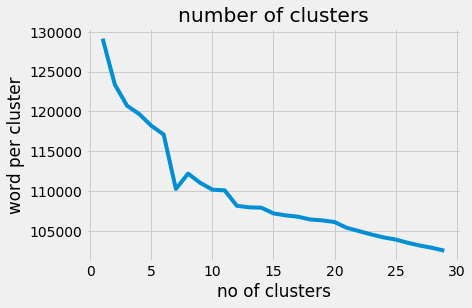

In [66]:
plt.plot(range(1,30),nb)
plt.title('number of clusters')
plt.xlabel('no of clusters')
plt.ylabel('word per cluster')
plt.show()

In [67]:
true_k=30
Kmeans=KMeans(n_clusters=true_k,init='k-means++',n_init=1)
Kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=30, n_init=1, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [68]:
print("Top terms per cluster:")
order_centroids = Kmeans.cluster_centers_.argsort()[:, ::-1]
terms = cv.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i)
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind])
    print()
print("\n")

Top terms per cluster:
Cluster 0:
 school
 high
 footbal
 texa
 fall
 commun
 he
 live
 season
 covid

Cluster 1:
 action
 millwal
 act
 boo
 colchest
 fa
 gpa
 take
 lb
 player

Cluster 2:
 then
 the
 me
 fantasi
 keenan
 allen
 catch
 sit
 ball
 and

Cluster 3:
 footbal
 play
 team
 the
 colleg
 get
 year
 watch
 coach
 club

Cluster 4:
 social
 last
 experi
 creat
 arsen
 convinc
 im
 see
 govern
 decad

Cluster 5:
 game
 york
 new
 attend
 safe
 scientist
 footbal
 long
 break
 determin

Cluster 6:
 alway
 tri
 win
 want
 even
 everyon
 respect
 compet
 messi
 footbal

Cluster 7:
 join
 leagu
 club
 and
 champion
 sinc
 never
 drop
 what
 joi

Cluster 8:
 job
 achiev
 manag
 there
 hope
 footbal
 man
 got
 us
 use

Cluster 9:
 dame
 notr
 kelli
 brian
 footbal
 colleg
 playoff
 famili
 if
 attend

Cluster 10:
 teko
 modis
 mid
 psl
 mamelodi
 themba
 longstand
 equal
 record
 zwane

Cluster 11:
 colleg
 throw
 justin
 qb
 field
 accur
 footbal
 yard
 most
 footballth

Cluster 12:
 

In [69]:
result_final_data_analysis = pd.DataFrame(columns = ['tweet'])
i=0
j=0
while i<30:
    while True: 
        Y=cv.transform([stemed_dataset[j]])
        prediction=Kmeans.predict(Y)
        if i == prediction:
            print("tweet of cluster "+str(prediction)+data_analysis.loc[j,"Tweet_punct"])
            result_final_data_analysis.loc[i,"tweet"] =data_analysis.loc[j,"Tweet_punct"]
            j=0
            break
        j+=1
    i+=1
result_final_data_analysis.to_csv('result_final_data_analysis.csv',index = False )

tweet of cluster [0]Carthage has to have the best stretch of a powerhouse program in the history of Texas high school football Surratt created a monster
tweet of cluster [1] Temple LB Isaiah GrahamMobley has transferred to Boston College Another big get for Jeff Hafley and his transforming
tweet of cluster [2] Keenan Allen Yelling DONT SIT ME To Fantasy Football Owners Before The Game And Then Catching  Ball Should Be A Cri
tweet of cluster [3]The Monett football team had four athletes secure five spots on the AllDistrict football team 
tweet of cluster [4] Im convinced that Arsenal have been in a social experiment for the last decade which was created by the government to see
tweet of cluster [5]  BREAKING New York scientists have determined it is safe to attend football games as long as they are playoff games Reg
tweet of cluster [6]  Lionel Messi I always try to respect everyone on the football pitch even if I always want to win and to compete
tweet of cluster [7]   And its never dr

## <span style="color:blue"> Conclusion :</span>

on a charger les tweets appartir de l'api de twitter, on les a mis dans le fichier csv data_analysis. puis on a fait le data cleaning et on a mis le resultat dans le fichier cleaning_data_analysis.csv. par la suite en utilisant différents classificateurs NLTK, il était plus facile de classer les tweets et puis on a améliorer l'ensemble de données d'entraînement, Et enfin on a mis un tweet de chaque cluster dans le fichier result_final_data_analysis et nous pouvons obtenir un résultat précis.